In [225]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from suaBibSignal import *
import peakutils
import math
from scipy.signal import resample

In [226]:
# O audio escolhido tem sampleRate de 4800, o código abaixo muda isso para 44100

class AudioProcessor:
    @staticmethod
    def modify_sample_rate(input_filename, output_filename, new_sample_rate=88200):
        # Read the audio file
        sample_rate, audio_data = wavfile.read(input_filename)

        # Calculate the resampling factor
        resampling_factor = new_sample_rate / sample_rate

        # Resample the audio data to the new sample rate
        resampled_audio = resample(audio_data, int(len(audio_data) * resampling_factor))

        # Save the modified audio to a new WAV file
        wavfile.write(output_filename, new_sample_rate, resampled_audio.astype(np.int16))

# Example usage:
input_filename = "golFox.wav"
output_filename = "initial44100.wav"
new_sample_rate = 44100

AudioProcessor.modify_sample_rate(input_filename, output_filename, new_sample_rate)

/tmp/ipykernel_8033/2784227443.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(input_filename)


In [227]:
samplarate, signal =wavfile.read('initial44100.wav')
print(samplarate)
sinal=[s[0] for s in signal]
print(sinal)


44100
[9, -3, 1, -1, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 2, -2, 1, 0, 0, 2, -2, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 1, -1, 0, 0, 0, 0, 1, -2, 3, -2, 2, -2, 1, -2, 2, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, -1, 0, 0, 1, -1, 1, -1, 2, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -2, 2, -2, 2, -2, 2, -1, 1, 0, 0, 0, 0, -1, 1, -2, 2, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 1, -2, 2, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0, -1, 1, -1, 1, -2, 2, -1, 1, -1, 0, 0, 0, 1, -1, 2, -3, 3, -3, 3, -2, 1, -1, 0, 0, 1, -1, 1, -2, 2, -1, 1, -2, 2, -2, 2, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 1, -1, 1, 0, 0, 1, -1, 1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 2, -2, 2, -2, 1, 0, 0, 1, -1, 2, -2, 3, -3, 3, -3, 4, -4, 3, -3, 2, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1, 0, 0, 1, -1, 1, -1, 1, -1, 1, -2, 1, -1, 0, 0, 0, 1, -1, 1, 0, 0, 1, -1, 2, -2,

Fizemos no matLab com wc =2500


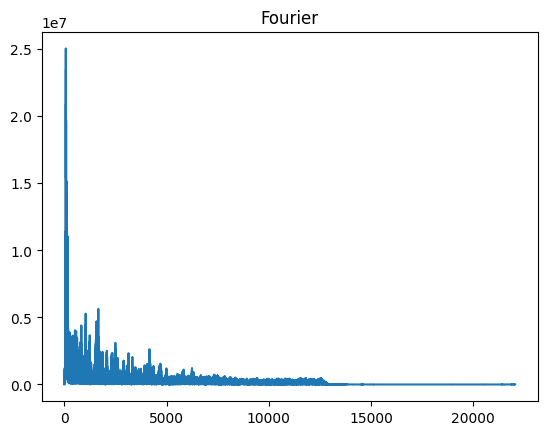

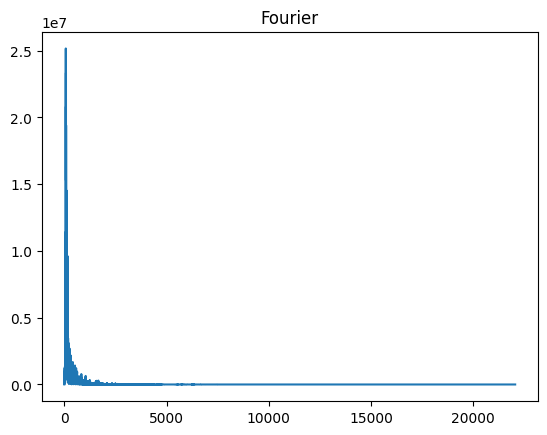

In [228]:
a=0.001647
b=0.00129
c=1
d=-1.89
e=0.8928

y=[]
y.append(sinal[0])
y.append(sinal[1])
for index in range(len(sinal)):
    if index>1:
        y.append(-d*y[index-1]-e*y[index-2]+a*sinal[(index-1)]+b*sinal[(index-2)])

s =signalMeu()
s.plotFFT(sinal,new_sample_rate)
s.plotFFT(y,new_sample_rate)


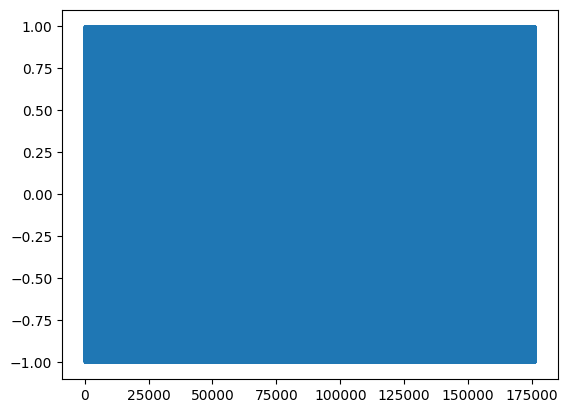

In [229]:
# portadora 
tempo=4
vetor_tempo=np.linspace(0,4,new_sample_rate*4)
y=y[0:176400]
vetor_portador=[]
for t in vetor_tempo:
    vetor_portador.append(math.sin(2*math.pi*14000*t))
plt.plot(vetor_portador)


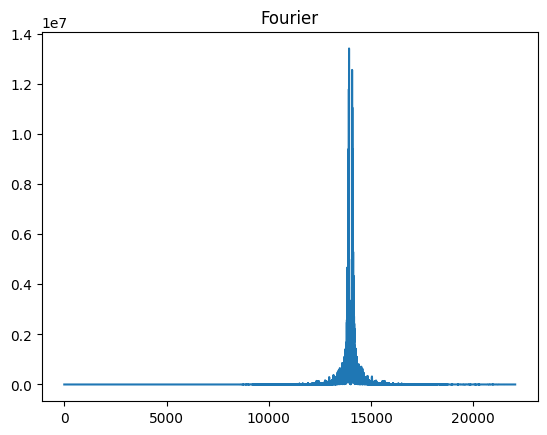

In [230]:
# sinal Am modulado
SinalAM=[]
for index in range(len(vetor_portador)):
    SinalAM.append(vetor_portador[index]+vetor_portador[index]*y[index])
s =signalMeu()
s.plotFFT(SinalAM,new_sample_rate)
    

In [231]:
# # normalizar o audio
# def normalize_signal(signal):
#     max_value = np.max(np.abs(signal))
#     normalized_signal = signal / max_value
#     return normalized_signal
        
        
# K=1/np.max(SinalAM)
# print(np.min(SinalAM))
# SinalAmNormal=[]
# for i in SinalAM:
#     SinalAmNormal.append(i*K)
# s =signalMeu()
# s.plotFFT(SinalAmNormal,new_sample_rate)
SinalAmNormal=SinalAM


In [232]:
wavfile.write('bacana.wav',44100,np.array(SinalAM))

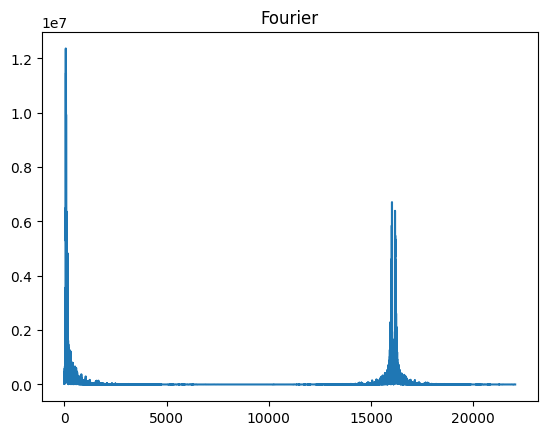

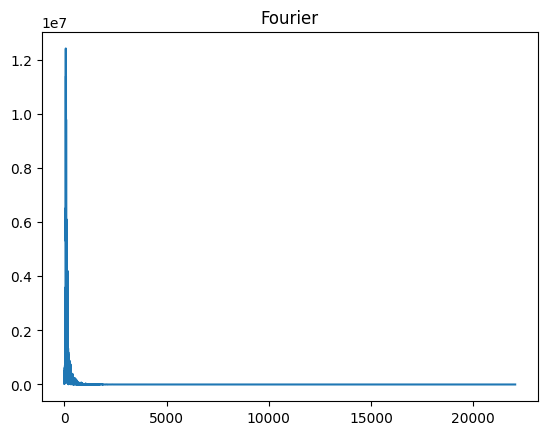

In [233]:
# demodulação\
SinalD1=[]
for index in range(len(SinalAmNormal)):
    SinalD1.append(SinalAmNormal[index]*vetor_portador[index])
a=0.001647
b=0.00129
c=1
d=-1.89
e=0.8928
SinalDemodulado=[]
SinalDemodulado.append(SinalD1[0])
SinalDemodulado.append(SinalD1[1])
for index in range(len(SinalD1)):
    if index>1:
        SinalDemodulado.append(-d*SinalDemodulado[(index-1)]-e*SinalDemodulado[(index-2)]+a*SinalD1[(index-1)]+b*SinalD1[(index-2)])


s =signalMeu()
s.plotFFT(SinalD1,new_sample_rate)
s.plotFFT(SinalDemodulado,new_sample_rate)

wavfile.write('audioDemodulado.wav',44100,np.array(SinalDemodulado))
    

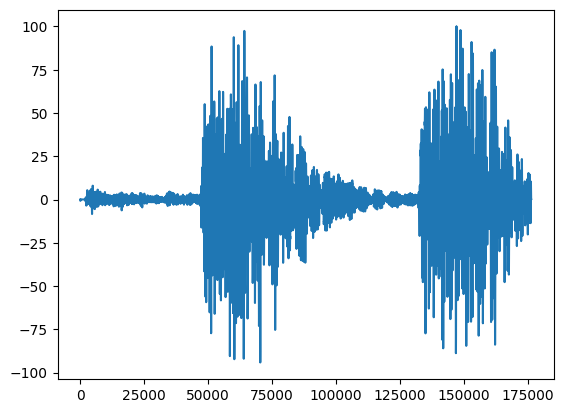

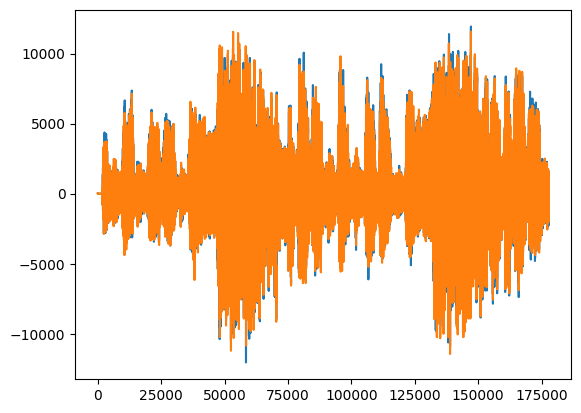

In [234]:

K=1/max(SinalDemodulado)*50
SinalFinal=[]
for index in range(len(SinalDemodulado)):
    SinalFinal.append(SinalDemodulado[index]*K)
plt.plot(SinalFinal)
plt.show()
plt.plot(signal)

In [235]:
sd.play(SinalFinal,new_sample_rate)
sd.wait()
wavfile.write('audioFinal.wav',44100,np.array(SinalFinal))